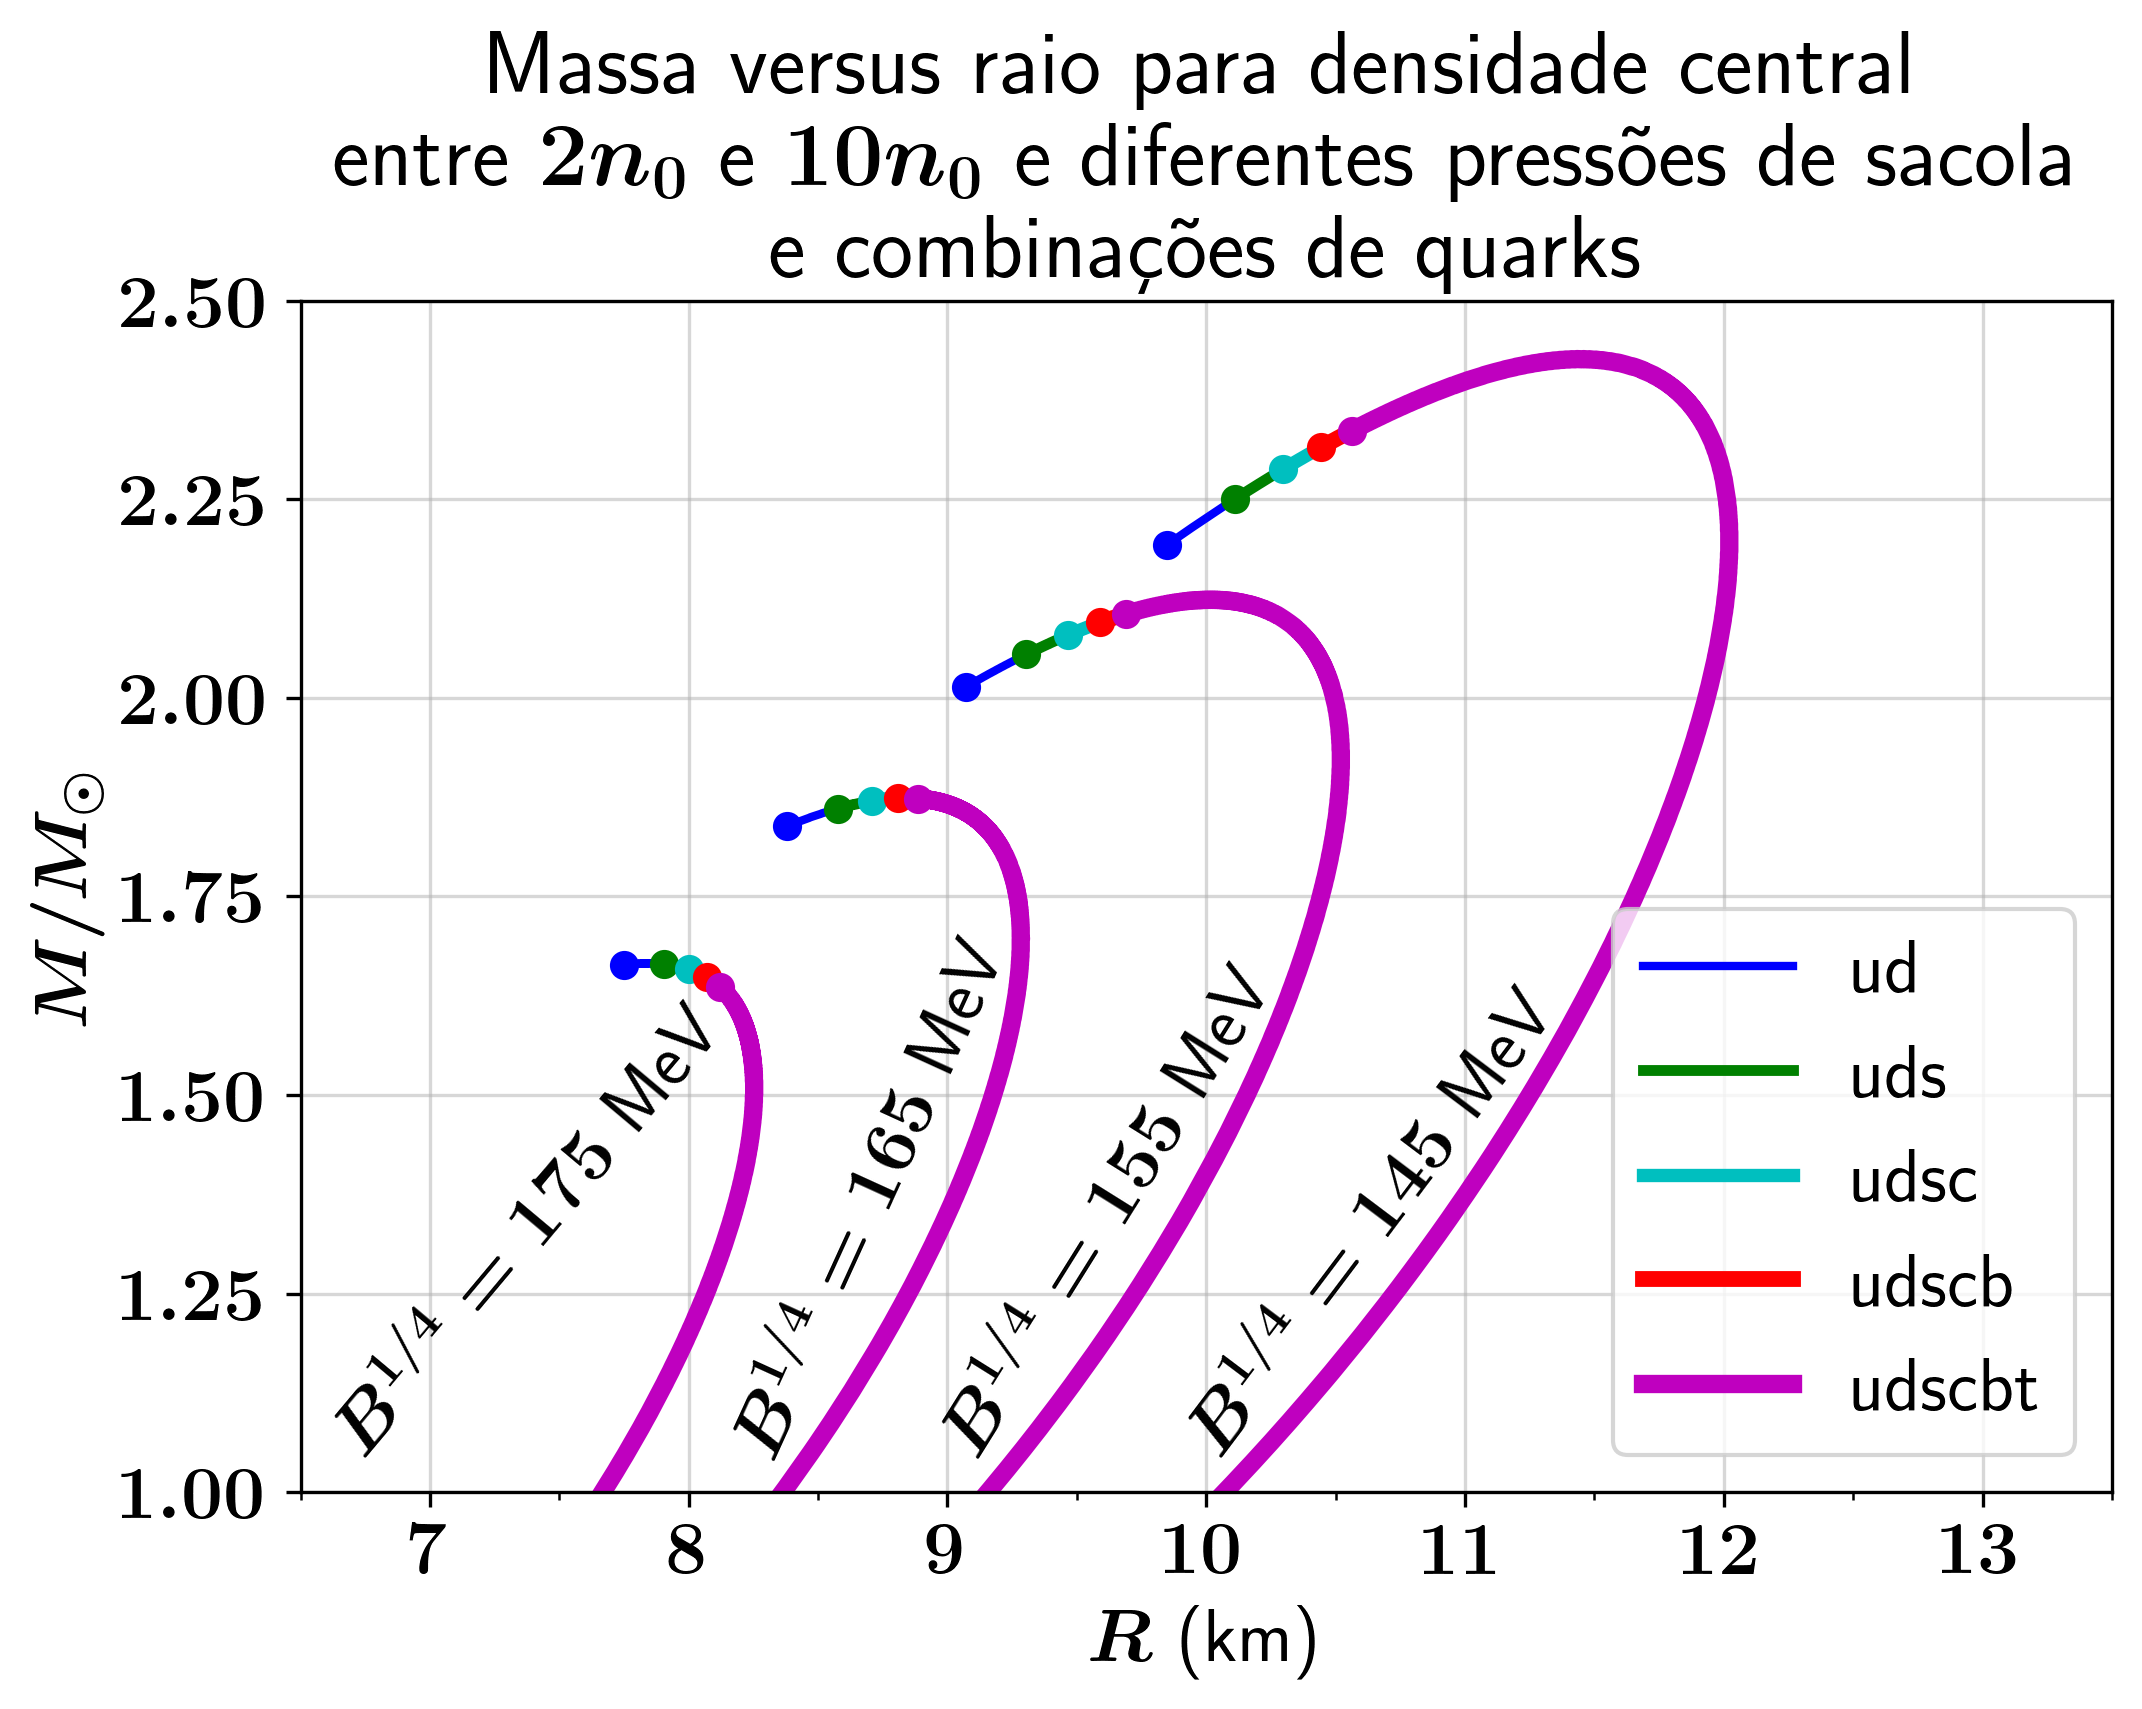

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\boldmath'
plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = [7.3, 6]
plt.rcParams['figure.dpi'] = 300

fig, ax1 = plt.subplots()
#-------------------------------------------------------
bagPressures = []
bagPressures.append(145)
bagPressures.append(155)
bagPressures.append(165)
bagPressures.append(175)
titles = []
titles.append('ud')
titles.append('uds')
titles.append('udsc')
titles.append('udscb')
titles.append('udscbt')
dirs = []
for bP in bagPressures:
    for i in titles:
        dirs.append('../cpp/output/P3' + i + str(bP) +'.dat')
#print(dirs)
cols = []
cols.append('b')
cols.append('g')
cols.append('c')
cols.append('r')
cols.append('m')

#ax1.set_title("B$^{1/4}$ = " + str(bagPressures[k]) + " MeV")
ax1.set_xlabel(r'$R$ (km)')
ax1.set_ylabel(r'$M/M_\odot$')
ax1.set_xlim([6.5, 13.5])
#ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylim([1,2.5])
        
for i in range(len(titles)*len(bagPressures)):
    x = []
    with open(dirs[i], 'r') as f: 
        #print(dirs[i])
        lines = f.readlines()
        x.append([float(line.split()[0]) for line in lines])
        x.append([float(line.split()[1]) for line in lines])
        x.append([float(line.split()[2]) for line in lines])

        ax1.grid(True, alpha=0.5)
        #ax1[k].plot(x[i][1],x[i][2], cols[i], label=titles[i])
        if i >= 5:
            ax1.plot(x[0],x[2], cols[i%5], linewidth = (0.6*(i%5))+2)
        else:
            ax1.plot(x[0],x[2], cols[i%5], label=str(titles[i%5]), linewidth = (0.6*(i%5))+2)
        ax1.plot(x[0][-1],x[2][-1], 'o', color=cols[i%5])
        #print(dirs[i], "|| Color: ", cols[i%5])

#plt.annotate('$B^{1/4} = 175$ MeV', (7.1,1.71))
plt.annotate('$B^{1/4} = 175$ MeV', (6.6,1.05), rotation = 50)
#plt.annotate('$B^{1/4} = 165$ MeV', (8.1,1.91))
plt.annotate('$B^{1/4} = 165$ MeV', (8.15,1.05), rotation = 65.5)
#plt.annotate('$B^{1/4} = 155$ MeV', (8.5,2.1))
plt.annotate('$B^{1/4} = 155$ MeV', (8.95,1.05), rotation = 58)
#plt.annotate('$B^{1/4} = 145$ MeV', (9.7,2.35))
plt.annotate('$B^{1/4} = 145$ MeV', (9.9,1.05), rotation = 53)
#plt.annotate('some text', xy=(xmean,ymean), xycoords='data')
ax1.legend(loc='lower right')
ax1.set_title("Massa versus raio para densidade central\nentre $2n_0$ e $10n_0$ e diferentes pressões de sacola\ne combinações de quarks ")

fig.tight_layout(pad=1)
plt.show()